In [1122]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [1123]:
leads= pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1124]:
leads.shape

(9240, 37)

In [1125]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1126]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1127]:
round(100*(leads.isnull().sum()/len(leads)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1128]:
def checkSelect(value):
    if(value=='Select'):
        return None
    else:
        return value

for column in leads.columns:
    leads[column]=leads[column].apply(checkSelect)

round(100*(leads.isnull().sum()/len(leads)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1129]:
def getPercentage(value):
    return round(100*(value.isnull().sum()/len(value)), 2) > 50.00

leads1=  leads.drop(leads.columns[leads.apply(getPercentage)], axis=1)



In [1130]:
round(100*(leads1.isnull().sum()/len(leads1)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1131]:
# it seems 'What matters most to you in choosing a course' column contains same values. Hence we can drop the column

leads1.drop(['What matters most to you in choosing a course'], axis=1 , inplace = True)


In [1132]:
leads2= leads1[leads1.isnull().sum(axis=1) <5]

round(100*(leads2.isnull().sum()/len(leads2)), 2)


Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.16
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.48
Last Activity                                0.29
Country                                     13.05
Specialization                              22.65
What is your current occupation             16.36
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [1133]:
leads2.shape

(6193, 33)

In [1134]:
leads2['Country'].value_counts()

India                   5155
United States             56
United Arab Emirates      44
Singapore                 19
Saudi Arabia              17
United Kingdom            11
Australia                 10
Qatar                      7
Hong Kong                  6
Bahrain                    6
France                     6
Kuwait                     4
South Africa               4
Oman                       4
Nigeria                    4
Canada                     3
Germany                    2
Bangladesh                 2
Ghana                      2
Sweden                     2
Philippines                2
unknown                    2
Netherlands                2
China                      2
Kenya                      1
Malaysia                   1
Russia                     1
Uganda                     1
Italy                      1
Denmark                    1
Asia/Pacific Region        1
Tanzania                   1
Switzerland                1
Indonesia                  1
Sri Lanka     

In [1135]:

def imputeMissingCountryValue(value):
   
    if(value == 'nan' or value== 'unknown'):
        return 'India'
    else:
        return value
leads2['Country'] = leads2['Country'].astype(str)
leads2['Country']=leads2['Country'].apply(imputeMissingCountryValue)
leads2['Country'].value_counts()


India                   5965
United States             56
United Arab Emirates      44
Singapore                 19
Saudi Arabia              17
United Kingdom            11
Australia                 10
Qatar                      7
Bahrain                    6
Hong Kong                  6
France                     6
Kuwait                     4
South Africa               4
Nigeria                    4
Oman                       4
Canada                     3
Philippines                2
Bangladesh                 2
Ghana                      2
China                      2
Sweden                     2
Netherlands                2
Germany                    2
Italy                      1
Asia/Pacific Region        1
Switzerland                1
Indonesia                  1
Belgium                    1
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Denmark                    1
Uganda                     1
Russia                     1
Malaysia      

In [1136]:
# City doesnt have enough information. either the values are wrong or missing. Hence deleting the column

leads2.drop(['City'], axis=1 , inplace = True)
round(100*(leads2.isnull().sum()/len(leads2)), 2)


Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.16
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.48
Last Activity                                0.29
Country                                      0.00
Specialization                              22.65
What is your current occupation             16.36
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [1137]:
leads2['What is your current occupation'].value_counts()


Unemployed              4479
Working Professional     538
Student                  135
Other                     14
Businessman                7
Housewife                  7
Name: What is your current occupation, dtype: int64

In [1138]:
def imputeMissingOccupationValue(value):
    if(value == 'nan' ):
        return 'Other'
    else:
        return value
leads2['What is your current occupation'] = leads2['What is your current occupation'].astype(str)
leads2['What is your current occupation']=leads2['What is your current occupation'].apply(imputeMissingOccupationValue)
leads2['What is your current occupation'].value_counts()

Unemployed              4479
Other                   1027
Working Professional     538
Student                  135
Businessman                7
Housewife                  7
Name: What is your current occupation, dtype: int64

In [1139]:
def imputeMissingSpecializationValue(value):
    if(value == 'None' ):
        return 'Other'
    else:
        return value
leads2['Specialization'] = leads2['Specialization'].astype(str)
leads2['Specialization']=leads2['Specialization'].apply(imputeMissingSpecializationValue)
leads2['Specialization'].value_counts()


Other                                1058
Finance Management                    799
Human Resource Management             674
Marketing Management                  657
Operations Management                 407
nan                                   345
Business Administration               339
IT Projects Management                308
Supply Chain Management               305
Banking, Investment And Insurance     287
Media and Advertising                 169
Travel and Tourism                    166
International Business                143
Healthcare Management                 124
Hospitality Management                 92
E-COMMERCE                             92
Retail Management                      81
Rural and Agribusiness                 63
E-Business                             49
Services Excellence                    35
Name: Specialization, dtype: int64

In [1140]:
leads2.groupby('Asymmetrique Activity Score')['Converted'].count()

Asymmetrique Activity Score
7.0        1
8.0        4
9.0        9
10.0      57
11.0      93
12.0     189
13.0     756
14.0    1697
15.0    1230
16.0     398
17.0     102
18.0       5
Name: Converted, dtype: int64

In [1141]:
import math
def imputeMissingASMScorenValue(value):
    if(math.isnan(value)):
        return 0
    else:
        return value

leads2['Asymmetrique Activity Score']=leads2['Asymmetrique Activity Score'].apply(imputeMissingASMScorenValue)
leads2.groupby('Asymmetrique Activity Score')['Converted'].count()


Asymmetrique Activity Score
0.0     1652
7.0        1
8.0        4
9.0        9
10.0      57
11.0      93
12.0     189
13.0     756
14.0    1697
15.0    1230
16.0     398
17.0     102
18.0       5
Name: Converted, dtype: int64

In [1142]:
print(leads2['Asymmetrique Activity Score'].value_counts())
len(leads2['Asymmetrique Activity Score'])
round(100* (leads2['Asymmetrique Activity Score'].value_counts()/len(leads2['Asymmetrique Activity Score'])),2)

14.0    1697
0.0     1652
15.0    1230
13.0     756
16.0     398
12.0     189
17.0     102
11.0      93
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64


14.0    27.40
0.0     26.68
15.0    19.86
13.0    12.21
16.0     6.43
12.0     3.05
17.0     1.65
11.0     1.50
10.0     0.92
9.0      0.15
18.0     0.08
8.0      0.06
7.0      0.02
Name: Asymmetrique Activity Score, dtype: float64

### inferences
Since the missing assymetric score has same conversion rate as of aysmmetrique score 14, We impute the msissing value with 14.

In [1143]:
import math
def imputeMissingASMSValue(value):
    if(value == 0.0):
        return 14.0
    else:
        return value

leads2['Asymmetrique Activity Score']=leads2['Asymmetrique Activity Score'].apply(imputeMissingASMSValue)
leads2.groupby('Asymmetrique Activity Score')['Converted'].count()

Asymmetrique Activity Score
7.0        1
8.0        4
9.0        9
10.0      57
11.0      93
12.0     189
13.0     756
14.0    3349
15.0    1230
16.0     398
17.0     102
18.0       5
Name: Converted, dtype: int64

In [1144]:
import math
def imputeMissingASPScorenValue(value):
    if(math.isnan(value)):
        return 0
    else:
        return value

leads2['Asymmetrique Profile Score']=leads2['Asymmetrique Profile Score'].apply(imputeMissingASPScorenValue)
leads2.groupby('Asymmetrique Profile Score')['Converted'].count()


Asymmetrique Profile Score
0.0     1652
11.0       9
12.0      22
13.0     199
14.0     220
15.0    1319
16.0     591
17.0     569
18.0    1068
19.0     236
20.0     308
Name: Converted, dtype: int64

### inferences
Since the missing assymetric score has same conversion rate as of aysmmetrique score 15, We impute the msissing value with 15.

In [1145]:

def imputeMissingASPSValue(value):
    if(value == 0.0):
        return 15.0
    else:
        return value

leads2['Asymmetrique Profile Score']=leads2['Asymmetrique Profile Score'].apply(imputeMissingASPSValue)
leads2.groupby('Asymmetrique Profile Score')['Converted'].count()

Asymmetrique Profile Score
11.0       9
12.0      22
13.0     199
14.0     220
15.0    2971
16.0     591
17.0     569
18.0    1068
19.0     236
20.0     308
Name: Converted, dtype: int64

In [1146]:
def imputeMissingSpecializationValue(value):
    if(value == 'None' ):
        return 'Other'
    else:
        return value
leads2['Asymmetrique Profile Index'] = leads2['Asymmetrique Profile Index'].astype(str)
leads2['Asymmetrique Profile Index']=leads2['Asymmetrique Profile Index'].apply(imputeMissingSpecializationValue)
leads2.groupby('Asymmetrique Profile Index')['Converted'].count()


Asymmetrique Profile Index
01.High      2181
02.Medium    2329
03.Low         31
nan          1652
Name: Converted, dtype: int64

In [1147]:
def imputeMissingAPIValue(value):
    if(value == 'nan' ):
        return '02.Medium'
    else:
        return value
leads2['Asymmetrique Profile Index'] = leads2['Asymmetrique Profile Index'].astype(str)
leads2['Asymmetrique Profile Index']=leads2['Asymmetrique Profile Index'].apply(imputeMissingAPIValue)
leads2.groupby('Asymmetrique Profile Index')['Converted'].count()

Asymmetrique Profile Index
01.High      2181
02.Medium    3981
03.Low         31
Name: Converted, dtype: int64

In [1148]:
def imputeMissingSpecializationValue(value):
    if(value == 'None' ):
        return 'Other'
    else:
        return value
leads2['Asymmetrique Activity Index'] = leads2['Asymmetrique Activity Index'] .astype(str)
leads2['Asymmetrique Activity Index'] =leads2['Asymmetrique Activity Index'] .apply(imputeMissingSpecializationValue)
leads2.groupby('Asymmetrique Activity Index')['Converted'].count()

Asymmetrique Activity Index
01.High       505
02.Medium    3683
03.Low        353
nan          1652
Name: Converted, dtype: int64

In [1149]:
def imputeMissingAPIValue(value):
    if(value == 'nan' ):
        return '02.Medium'
    else:
        return value
leads2['Asymmetrique Activity Index'] = leads2['Asymmetrique Activity Index'] .astype(str)
leads2['Asymmetrique Activity Index'] =leads2['Asymmetrique Activity Index'] .apply(imputeMissingAPIValue)
leads2.groupby('Asymmetrique Activity Index')['Converted'].count()

Asymmetrique Activity Index
01.High       505
02.Medium    5335
03.Low        353
Name: Converted, dtype: int64

In [1150]:
round(100*(leads2.isnull().sum()/len(leads2)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.16
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.48
Last Activity                                0.29
Country                                      0.00
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [1151]:
leads2['Tags'].value_counts()

Will revert after reading the email                  1696
Ringing                                              1041
Interested in other courses                           427
Already a student                                     364
Closed by Horizzon                                    253
switched off                                          211
Busy                                                  170
Lost to EINS                                          134
Not doing further education                           124
Interested  in full time MBA                          101
Graduation in progress                                 92
invalid number                                         75
Diploma holder (Not Eligible)                          47
wrong number given                                     45
opp hangup                                             30
number not provided                                    23
in touch with EINS                                     10
Still Thinking

In [1152]:
def imputeMissingTagValue(value):
    if(value == 'nan' ):
        return 'Other'
    else:
        return value
leads2['Tags'] = leads2['Tags'].astype(str)
leads2['Tags']=leads2['Tags'].apply(imputeMissingTagValue)
leads2['Tags'].value_counts()

Will revert after reading the email                  1696
Other                                                1318
Ringing                                              1041
Interested in other courses                           427
Already a student                                     364
Closed by Horizzon                                    253
switched off                                          211
Busy                                                  170
Lost to EINS                                          134
Not doing further education                           124
Interested  in full time MBA                          101
Graduation in progress                                 92
invalid number                                         75
Diploma holder (Not Eligible)                          47
wrong number given                                     45
opp hangup                                             30
number not provided                                    23
in touch with 

In [1153]:
round(100*(leads2.isnull().sum()/len(leads2)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.16
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.48
Last Activity                               0.29
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [1154]:
leads2= leads2[leads2.isnull().sum(axis=1) <1]
round(100*(leads2.isnull().sum()/len(leads2)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [1155]:
leads2.shape

(6153, 32)

In [1156]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
values= ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','Asymmetrique Activity Index','Asymmetrique Profile Index','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']
for column in values:
    leads2[column] = le.fit_transform(leads2[column])

In [1157]:
leads2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,6,0,0,0,0.0,0,0.0,...,8,0,0,1,1,15.0,15.0,0,0,7
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,7,0,0,0,5.0,674,2.5,...,15,0,0,1,1,15.0,15.0,0,0,4
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,1,0,0,1,2.0,1532,2.0,...,20,0,0,1,0,14.0,20.0,0,1,4
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,1,1,0,0,0,1.0,305,1.0,...,15,0,0,1,0,13.0,17.0,0,0,7
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,3,0,0,1,2.0,1428,1.0,...,20,0,0,1,0,15.0,18.0,0,0,7


In [1158]:
leads2.shape

(6153, 32)

In [1159]:
from sklearn.model_selection import train_test_split

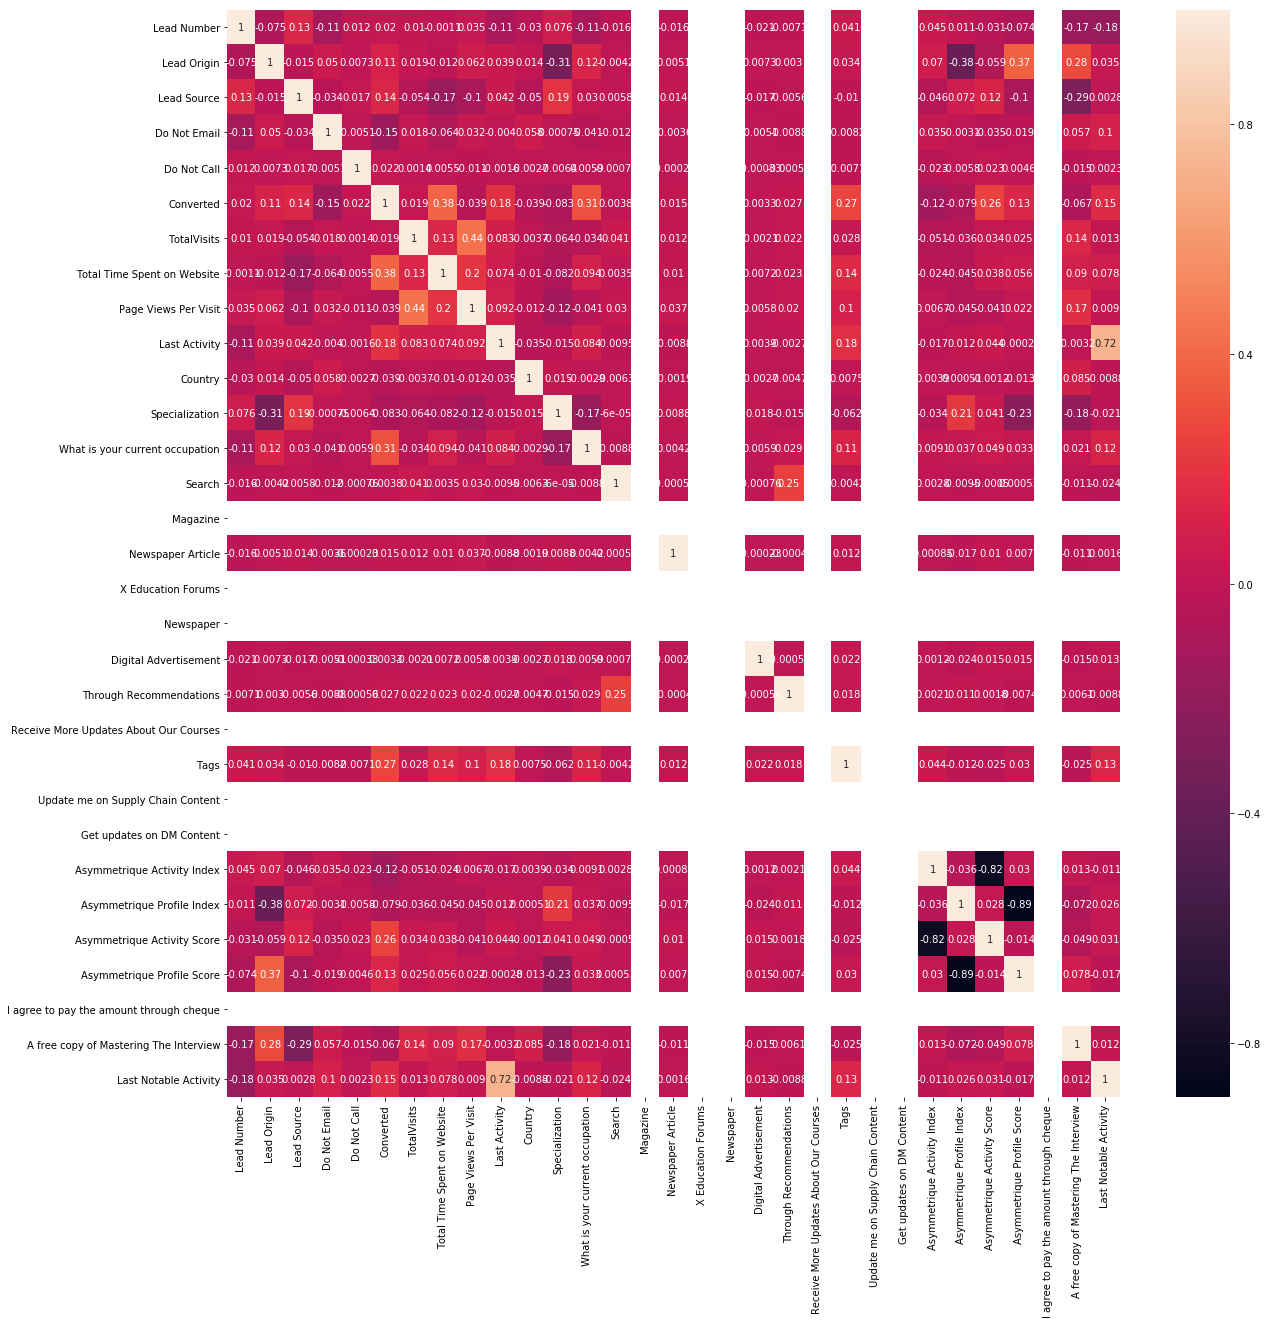

In [1160]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(leads2.corr(),annot = True)
plt.show()

In [1161]:
# Dropping the highly correlated values
leads2 = leads2.drop(['Magazine','Newspaper','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                       'Get updates on DM Content','I agree to pay the amount through cheque','X Education Forums','Asymmetrique Activity Index','Asymmetrique Profile Index'], 1)

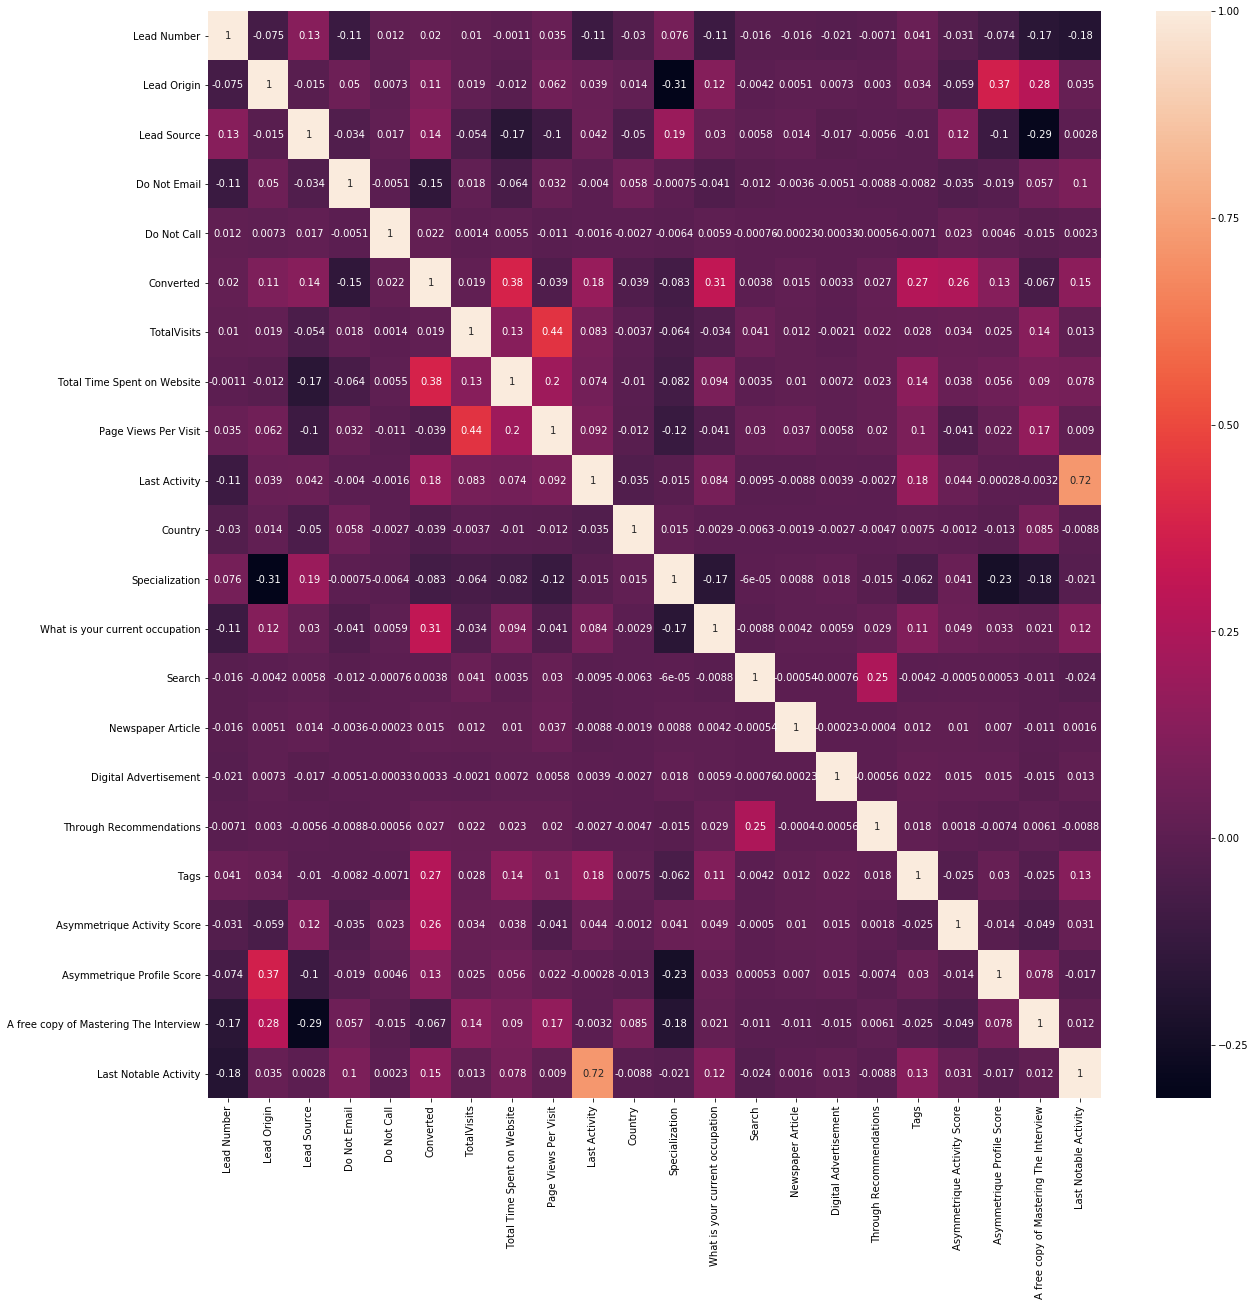

In [1162]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(leads2.corr(),annot = True)
plt.show()

In [1163]:
# Putting feature variable to X
X = leads2.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0,0.0,0,0.0,10,12,13,4,0,0,0,0,8,15.0,15.0,0,7
1,0,7,0,0,5.0,674,2.5,5,12,13,4,0,0,0,0,15,15.0,15.0,0,4
2,1,1,0,0,2.0,1532,2.0,5,12,1,3,0,0,0,0,20,14.0,20.0,1,4
3,1,1,0,0,1.0,305,1.0,12,12,11,4,0,0,0,0,15,13.0,17.0,0,7
4,1,3,0,0,2.0,1428,1.0,1,12,13,4,0,0,0,0,20,15.0,18.0,0,7


In [1164]:
# Putting response variable to y
y = leads2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1165]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1166]:
from sklearn.preprocessing import StandardScaler

In [1167]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
8050,1,7,0,0,0.878443,0.741154,2.803892,11,12,11,4,0,0,0,0,20,0.815620,0.556753,1,10
4317,1,1,0,0,-0.197115,-0.805207,0.073989,5,12,10,4,0,0,0,0,20,-0.098239,-0.630638,1,4
580,1,3,0,0,0.340664,0.932197,0.073989,10,12,4,4,0,0,0,0,13,0.815620,1.150449,0,9
846,2,10,0,0,-0.734894,-1.035900,-1.290963,5,12,4,4,0,0,0,0,20,0.815620,1.744145,0,4
2348,0,3,0,0,-0.197115,-0.241092,0.073989,5,12,19,2,0,0,0,0,13,-0.098239,-0.630638,0,7


In [1168]:
### Checking the Converted Rate
converted = (sum(leads2['Converted'])/len(leads2['Converted'].index))*100
converted

41.053144807411016

In [1169]:
import statsmodels.api as sm

In [1170]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4307
Model:                            GLM   Df Residuals:                     4287
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1850.8
Date:                Mon, 07 Oct 2019   Deviance:                       3701.6
Time:                        04:46:42   Pearson chi2:                 4.81e+03
No. Iterations:                    20   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -6.4917      0.342    -18.979      0.000      -7.162      -5.821
Lead Origin                                0.4438      0.087      5.105      0.000       0.273       0.614
Lead Source                                0.1504      0.016      9.493      0.000       0.119       0.181
Do Not Email                              -1.5536      0.195     -7.956      0.000      -1.936      -1.171
Do Not Call                               19.6571   2.01e+04      0.001      0.999   -3.95e+04    3.95e+04
TotalVisits                                0.1014      0.049      2.074      0.038       0.006       0.197
Total Time Spent on Website                1.0641      0.046     23.109      0.000       0.974       1.154
Page Views Per Visit                      -0.4048      0.051     -7.871      0.000      -0.506      -0.304
Last Activity                              0.0832      0.019      4.305      0.000       0.045       0.121
Country                                   -0.0046      0.013     -0.345      0.730      -0.031       0.021
Specialization                            -0.0191      0.009     -2.157      0.031      -0.036      -0.002
What is your current occupation            0.9081      0.061     14.863      0.000       0.788       1.028
Search                                    -0.1690      1.284     -0.132      0.895      -2.685       2.347
Newspaper Article                      -7.368e-11   1.15e-07     -0.001      0.999   -2.25e-07    2.25e-07
Digital Advertisement                    -22.0501   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations                    0.3631      1.935      0.188      0.851      -3.430       4.156
Tags                                       0.0950      0.006     14.709      0.000       0.082       0.108
Asymmetrique Activity Score                0.8996      0.054     16.576      0.000       0.793       1.006
Asymmetrique Profile Score                 0.3187      0.046      6.939      0.000       0.229       0.409
A free copy of Mastering The Interview    -0.1557      0.094     -1.663      0.096      -0.339       0.028
Last Notable Activity                      0.0201      0.025      0.796      0.426      -0.029       0.070
==========================================================================================================
"""

In [1171]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1172]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [1173]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True, False])

In [1174]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', False, 4),
 ('Specialization', False, 3),
 ('What is your current occupation', True, 1),
 ('Search', False, 2),
 ('Newspaper Article', False, 6),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('Tags', True, 1),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Last Notable Activity', False, 5)]

In [1175]:
col = X_train.columns[rfe.support_]
print(col)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview'],
      dtype='object')


In [1176]:
X_train.columns[~rfe.support_]

Index(['Country', 'Specialization', 'Search', 'Newspaper Article',
       'Last Notable Activity'],
      dtype='object')

In [1177]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4307
Model:                            GLM   Df Residuals:                     4291
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1853.5
Date:                Mon, 07 Oct 2019   Deviance:                       3707.1
Time:                        04:46:43   Pearson chi2:                 4.84e+03
No. Iterations:                    20   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -6.7371      0.282    -23.893      0.000      -7.290      -6.184
Lead Origin                                0.4823      0.085      5.661      0.000       0.315       0.649
Lead Source                                0.1442      0.016      9.257      0.000       0.114       0.175
Do Not Email                              -1.5393      0.194     -7.920      0.000      -1.920      -1.158
Do Not Call                               19.7241   2.02e+04      0.001      0.999   -3.95e+04    3.95e+04
TotalVisits                                0.1020      0.050      2.037      0.042       0.004       0.200
Total Time Spent on Website                1.0651      0.046     23.192      0.000       0.975       1.155
Page Views Per Visit                      -0.4009      0.051     -7.805      0.000      -0.502      -0.300
Last Activity                              0.0940      0.013      7.385      0.000       0.069       0.119
What is your current occupation            0.9228      0.061     15.182      0.000       0.804       1.042
Digital Advertisement                    -22.1993   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations                    0.2618      1.739      0.151      0.880      -3.146       3.670
Tags                                       0.0951      0.006     14.750      0.000       0.082       0.108
Asymmetrique Activity Score                0.8943      0.054     16.541      0.000       0.788       1.000
Asymmetrique Profile Score                 0.3299      0.046      7.233      0.000       0.241       0.419
A free copy of Mastering The Interview    -0.1510      0.093     -1.625      0.104      -0.333       0.031
==========================================================================================================
"""

In [1178]:
#Remove Do Not Call
col2=['Lead Origin', 'Lead Source', 'Do Not Email', 
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview']
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4307
Model:                            GLM   Df Residuals:                     4292
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1853.8
Date:                Mon, 07 Oct 2019   Deviance:                       3707.7
Time:                        04:46:43   Pearson chi2:                 4.84e+03
No. Iterations:                    19   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -6.7394      0.282    -23.898      0.000      -7.292      -6.187
Lead Origin                                0.4837      0.085      5.683      0.000       0.317       0.651
Lead Source                                0.1443      0.016      9.268      0.000       0.114       0.175
Do Not Email                              -1.5402      0.194     -7.924      0.000      -1.921      -1.159
TotalVisits                                0.1021      0.050      2.038      0.042       0.004       0.200
Total Time Spent on Website                1.0655      0.046     23.200      0.000       0.975       1.156
Page Views Per Visit                      -0.4013      0.051     -7.812      0.000      -0.502      -0.301
Last Activity                              0.0940      0.013      7.389      0.000       0.069       0.119
What is your current occupation            0.9232      0.061     15.185      0.000       0.804       1.042
Digital Advertisement                    -21.2001   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Through Recommendations                    0.2616      1.739      0.150      0.880      -3.147       3.671
Tags                                       0.0951      0.006     14.749      0.000       0.082       0.108
Asymmetrique Activity Score                0.8952      0.054     16.561      0.000       0.789       1.001
Asymmetrique Profile Score                 0.3300      0.046      7.234      0.000       0.241       0.419
A free copy of Mastering The Interview    -0.1517      0.093     -1.633      0.103      -0.334       0.030
==========================================================================================================
"""

In [1179]:
#Remove Digital Advertisement
col2=['Lead Origin', 'Lead Source', 'Do Not Email', 
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'Through Recommendations', 'Tags',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview']
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4307
Model:                            GLM   Df Residuals:                     4293
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1854.9
Date:                Mon, 07 Oct 2019   Deviance:                       3709.8
Time:                        04:46:43   Pearson chi2:                 4.84e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -6.7361      0.282    -23.891      0.000      -7.289      -6.184
Lead Origin                                0.4823      0.085      5.667      0.000       0.315       0.649
Lead Source                                0.1449      0.016      9.305      0.000       0.114       0.175
Do Not Email                              -1.5385      0.194     -7.916      0.000      -1.919      -1.158
TotalVisits                                0.1023      0.050      2.040      0.041       0.004       0.201
Total Time Spent on Website                1.0666      0.046     23.226      0.000       0.977       1.157
Page Views Per Visit                      -0.4022      0.051     -7.828      0.000      -0.503      -0.302
Last Activity                              0.0938      0.013      7.368      0.000       0.069       0.119
What is your current occupation            0.9229      0.061     15.182      0.000       0.804       1.042
Through Recommendations                    0.2631      1.739      0.151      0.880      -3.145       3.671
Tags                                       0.0949      0.006     14.722      0.000       0.082       0.107
Asymmetrique Activity Score                0.8934      0.054     16.542      0.000       0.788       0.999
Asymmetrique Profile Score                 0.3295      0.046      7.224      0.000       0.240       0.419
A free copy of Mastering The Interview    -0.1487      0.093     -1.601      0.109      -0.331       0.033
==========================================================================================================
"""

In [1180]:
#Remove Through Recommendations
col2=['Lead Origin', 'Lead Source', 'Do Not Email', 
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'Tags',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview']
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4307
Model:                            GLM   Df Residuals:                     4294
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1854.9
Date:                Mon, 07 Oct 2019   Deviance:                       3709.8
Time:                        04:46:43   Pearson chi2:                 4.84e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -6.7364      0.282    -23.893      0.000      -7.289      -6.184
Lead Origin                                0.4823      0.085      5.667      0.000       0.316       0.649
Lead Source                                0.1449      0.016      9.306      0.000       0.114       0.175
Do Not Email                              -1.5387      0.194     -7.917      0.000      -1.920      -1.158
TotalVisits                                0.1024      0.050      2.041      0.041       0.004       0.201
Total Time Spent on Website                1.0667      0.046     23.230      0.000       0.977       1.157
Page Views Per Visit                      -0.4022      0.051     -7.827      0.000      -0.503      -0.301
Last Activity                              0.0937      0.013      7.367      0.000       0.069       0.119
What is your current occupation            0.9230      0.061     15.185      0.000       0.804       1.042
Tags                                       0.0949      0.006     14.726      0.000       0.082       0.107
Asymmetrique Activity Score                0.8935      0.054     16.544      0.000       0.788       0.999
Asymmetrique Profile Score                 0.3295      0.046      7.224      0.000       0.240       0.419
A free copy of Mastering The Interview    -0.1487      0.093     -1.601      0.109      -0.331       0.033
==========================================================================================================
"""

In [1181]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8050    0.869532
4317    0.197147
580     0.895710
846     0.915090
2348    0.033684
2503    0.021928
6476    0.155633
8411    0.705424
2018    0.930474
7662    0.098405
dtype: float64

In [1182]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86953173, 0.19714731, 0.89570968, 0.91509024, 0.0336838 ,
       0.02192786, 0.15563264, 0.70542428, 0.93047389, 0.09840479])

In [1183]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Prospect ID
0,1,0.869532,8050
1,1,0.197147,4317
2,1,0.895710,580
3,1,0.915090,846
4,0,0.033684,2348
5,0,0.021928,2503
6,0,0.155633,6476
7,1,0.705424,8411
8,1,0.930474,2018
9,0,0.098405,7662


In [1184]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.869532,8050,1
1,1,0.197147,4317,0
2,1,0.895710,580,1
3,1,0.915090,846,1
4,0,0.033684,2348,0
5,0,0.021928,2503,0
6,0,0.155633,6476,0
7,1,0.705424,8411,1
8,1,0.930474,2018,1
9,0,0.098405,7662,0


In [1185]:
from sklearn import metrics

In [1186]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2153  353]
 [ 460 1341]]


In [1187]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.811237520315765


Checking VIFS

In [1188]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1189]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation,9.95
7,Last Activity,5.51
11,Tags,5.26
0,Lead Origin,3.93
1,Lead Source,2.82
14,A free copy of Mastering The Interview,2.00
6,Page Views Per Visit,1.27
4,TotalVisits,1.22
13,Asymmetrique Profile Score,1.18
2,Do Not Email,1.10


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'What is your current occupation' has the highest VIF. So let's start by dropping that.

In [1190]:
#Remove Through Recommendations
col3=['Lead Origin', 'Lead Source', 'Do Not Email', 
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 
       'Tags',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview']

In [1191]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4307
Model:                            GLM   Df Residuals:                     4295
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1999.4
Date:                Mon, 07 Oct 2019   Deviance:                       3998.8
Time:                        04:46:44   Pearson chi2:                 4.69e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.5801      0.163    -21.932      0.000      -3.900      -3.260
Lead Origin                                0.6241      0.082      7.587      0.000       0.463       0.785
Lead Source                                0.1474      0.015      9.877      0.000       0.118       0.177
Do Not Email                              -1.6066      0.188     -8.533      0.000      -1.976      -1.238
TotalVisits                                0.0685      0.038      1.794      0.073      -0.006       0.143
Total Time Spent on Website                1.0474      0.044     23.799      0.000       0.961       1.134
Page Views Per Visit                      -0.4384      0.048     -9.180      0.000      -0.532      -0.345
Last Activity                              0.0980      0.012      8.037      0.000       0.074       0.122
Tags                                       0.1076      0.006     16.762      0.000       0.095       0.120
Asymmetrique Activity Score                0.8670      0.051     16.962      0.000       0.767       0.967
Asymmetrique Profile Score                 0.2829      0.043      6.538      0.000       0.198       0.368
A free copy of Mastering The Interview    -0.1104      0.089     -1.244      0.213      -0.284       0.063
==========================================================================================================
"""

In [1192]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1193]:
y_train_pred[:10]

array([0.84139781, 0.19325753, 0.86597898, 0.91805901, 0.1405775 ,
       0.10220485, 0.13694429, 0.64441722, 0.8199159 , 0.06192533])

In [1194]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [1195]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.841398,8050,1
1,1,0.193258,4317,0
2,1,0.865979,580,1
3,1,0.918059,846,1
4,0,0.140577,2348,0


In [1196]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7901091246807522


In [1197]:
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity,4.55
7,Tags,4.27
0,Lead Origin,3.58
1,Lead Source,2.53
10,A free copy of Mastering The Interview,1.91
5,Page Views Per Visit,1.26
3,TotalVisits,1.22
9,Asymmetrique Profile Score,1.17
2,Do Not Email,1.10
4,Total Time Spent on Website,1.10


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [1198]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2121,  385],
       [ 519, 1282]], dtype=int64)

In [1199]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1200]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7118267629094948

In [1201]:
# Let us calculate specificity
TN / float(TN+FP)

0.8463687150837989

In [1202]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15363128491620112


In [1203]:
# positive predictive value 
print (TP / float(TP+FP))

0.7690461907618477


In [1204]:
# Negative predictive value
print (TN / float(TN+ FN))

0.803409090909091


An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1205]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1206]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

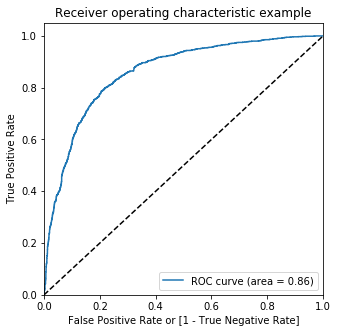

In [1207]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1208]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.841398,8050,1,1,1,1,1,1,1,1,1,1,0
1,1,0.193258,4317,0,1,1,0,0,0,0,0,0,0,0
2,1,0.865979,580,1,1,1,1,1,1,1,1,1,1,0
3,1,0.918059,846,1,1,1,1,1,1,1,1,1,1,1
4,0,0.140577,2348,0,1,1,0,0,0,0,0,0,0,0


In [1209]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.418156  1.000000  0.000000
0.1   0.1  0.579522  0.975014  0.295291
0.2   0.2  0.693987  0.931149  0.523543
0.3   0.3  0.760390  0.875069  0.677973
0.4   0.4  0.787091  0.801777  0.776536
0.5   0.5  0.790109  0.711827  0.846369
0.6   0.6  0.777804  0.619656  0.891460
0.7   0.7  0.743673  0.484175  0.930168
0.8   0.8  0.705131  0.345919  0.963288
0.9   0.9  0.641746  0.159356  0.988428


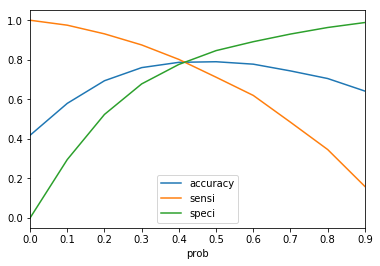

In [1210]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [1211]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.841398,8050,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.193258,4317,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.865979,580,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.918059,846,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.140577,2348,0,1,1,0,0,0,0,0,0,0,0,0


In [1212]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7603900626886464

In [1213]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1699,  807],
       [ 225, 1576]], dtype=int64)

In [1214]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1215]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8750694058856191

In [1216]:
# Let us calculate specificity
TN / float(TN+FP)

0.6779728651237031

In [1217]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.32202713487629686


In [1218]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6613512379353755


In [1219]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8830561330561331


Making predictions on test set

In [1220]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

In [1221]:
X_test = X_test[col3]
X_test.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Tags,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview
2291,1,1,0,-0.567657,-0.861249,-0.393514,5,20,-0.988804,0.525786,1
1730,1,3,0,-0.837525,2.099297,-0.913580,1,20,0.816668,2.252834,0
6153,1,3,0,-0.027922,0.177762,0.646617,5,8,-0.086068,-0.625579,0
1687,1,7,0,-0.297790,-0.741153,0.126551,10,12,-0.086068,-0.625579,1
8991,0,3,0,-0.837525,-0.388144,-0.913580,1,0,1.719404,-1.201262,0


In [1222]:
X_test_sm = sm.add_constant(X_test)

In [1223]:
y_test_pred = res.predict(X_test_sm)

In [1224]:
y_test_pred[:10]

2291    0.147654
1730    0.974029
6153    0.180458
1687    0.296016
8991    0.124296
8235    0.228779
131     0.056221
1805    0.701385
5362    0.906289
7674    0.818016
dtype: float64

In [1225]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1226]:
# Let's see the head
y_pred_1.head()

,0
2291,0.147654
1730,0.974029
6153,0.180458
1687,0.296016
8991,0.124296


In [1227]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1228]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index


In [1229]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1230]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1231]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2291,0.147654
1,1,1730,0.974029
2,0,6153,0.180458
3,0,1687,0.296016
4,0,8991,0.124296


In [1232]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1233]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [1234]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,2291,0,0.147654
1,1730,1,0.974029
2,6153,0,0.180458
3,1687,0,0.296016
4,8991,0,0.124296


In [1238]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [1239]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,2291,0,0.147654,0
1,1730,1,0.974029,1
2,6153,0,0.180458,0
3,1687,0,0.296016,0
4,8991,0,0.124296,0


In [1241]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7605633802816901

In [1242]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[836, 285],
       [157, 568]], dtype=int64)

In [1243]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1244]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.783448275862069

In [1245]:
# Let us calculate specificity
TN / float(TN+FP)

0.7457627118644068